In [145]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [146]:
import pandas as pd
df = pd.read_csv("D:/Newcastle Univ/CSC8639 - Dissertation/Extra Datasets/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [148]:
print(df.isnull().any()) 

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool


In [149]:
a = df["label"].unique()
a

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [150]:
len(df["label"].unique())

22

In [151]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [152]:
df["num_label"] = pd.Categorical(df["label"]).codes
df

,N,P,K,temperature,humidity,ph,rainfall,label,num_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [153]:
b = df["num_label"].unique()
b

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5], dtype=int8)

In [154]:
c = dict(zip(a, b))
c

{'rice': 20,
 'maize': 11,
 'chickpea': 3,
 'kidneybeans': 9,
 'pigeonpeas': 18,
 'mothbeans': 13,
 'mungbean': 14,
 'blackgram': 2,
 'lentil': 10,
 'pomegranate': 19,
 'banana': 1,
 'mango': 12,
 'grapes': 7,
 'watermelon': 21,
 'muskmelon': 15,
 'apple': 0,
 'orange': 16,
 'papaya': 17,
 'coconut': 4,
 'cotton': 6,
 'jute': 8,
 'coffee': 5}

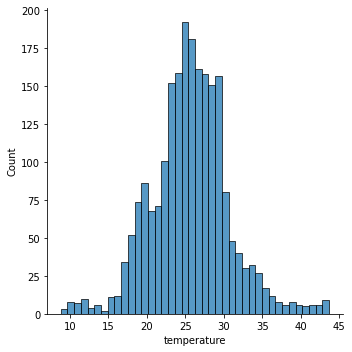

In [155]:
import seaborn as sns 
sns.displot(data = df, x = "temperature")

<AxesSubplot:xlabel='rainfall', ylabel='Count'>

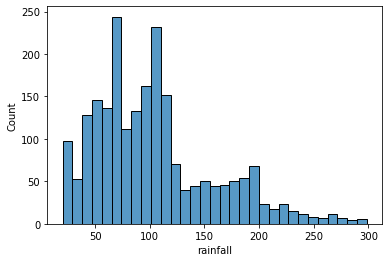

In [156]:
sns.histplot(df["rainfall"])

<AxesSubplot:xlabel='humidity'>

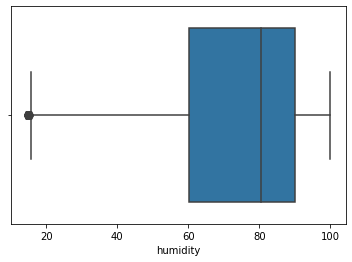

In [182]:
sns.boxplot(data = df, x = "humidity")

<AxesSubplot:xlabel='K', ylabel='Count'>

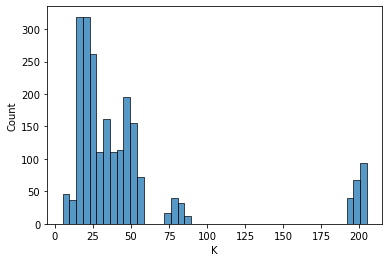

In [158]:
sns.histplot(df["K"])

In [159]:
x = df.iloc[:, 0:7]
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [160]:
y = df.iloc[:, 8:]
y

,num_label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [161]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [162]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_train

array([[-0.68993183, -0.39973591, -0.5368313 , ...,  0.43617147,
        -0.29206239, -1.07911878],
       [-1.04379061,  0.3144815 , -0.61847336, ..., -2.33535227,
        -0.96596193,  0.63214049],
       [-0.47217258, -0.18236539, -0.02656846, ...,  1.01187724,
         0.45633624,  1.92129315],
       ...,
       [-1.26154986, -0.39973591, -0.43477873, ..., -1.02537719,
         0.3050173 , -0.14088006],
       [ 0.20832508,  0.3144815 ,  0.68779952, ..., -2.54533602,
         0.04579968, -0.44738876],
       [-1.31598967, -0.05815367, -0.61847336, ..., -1.14230796,
        -0.81215495, -1.18159323]])

In [163]:
x_test = scalar.transform(x_test)
x_test

array([[ 1.32434123, -1.17605917, -0.41436822, ..., -0.63451735,
         0.02762354,  1.12737338],
       [-0.68993183,  0.22132271, -0.51642079, ..., -2.25448155,
        -0.75036829,  0.55860185],
       [-0.33607305, -1.05184745, -0.33272616, ..., -1.00206585,
        -0.79110427, -0.2352027 ],
       ...,
       [ 1.26990142, -0.95868866,  0.0550736 , ...,  0.66084919,
         0.36819506, -0.81031556],
       [ 0.09944545,  0.37658736, -0.00615794, ...,  0.90362266,
         0.30729096,  0.84089305],
       [-0.63549202,  0.19026977, -0.55724181, ..., -0.84407002,
        -2.63810209, -1.2273626 ]])

In [164]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

In [169]:
models = {
    LogisticRegression(max_iter = 1000): "Logistic Regression",
    DecisionTreeClassifier(): "Decision Tree",
    RandomForestClassifier(): "Random Forest",
    SVC(): "Support Vector Machine"
}
models

{LogisticRegression(max_iter=1000): 'Logistic Regression',
 DecisionTreeClassifier(): 'Decision Tree',
 RandomForestClassifier(): 'Random Forest',
 SVC(): 'Support Vector Machine'}

In [170]:
for mod in models.keys():
    mod.fit(x_train, y_train)

In [179]:
import math
for model, name in models.items():
     print(f"Accuracy Score for {name} is: {(model.score(x_test, y_test)) * 100} %")

Accuracy Score for Logistic Regression is: 98.63636363636363 %
Accuracy Score for Decision Tree is: 98.86363636363636 %
Accuracy Score for Random Forest is: 99.54545454545455 %
Accuracy Score for Support Vector Machine is: 98.4090909090909 %


In [129]:
for i, j in models.items():
    print(j)

Logistic Regression
Decision Tree
Random Forest
Support Vector Machine


In [127]:
models.items()

dict_items([(LogisticRegression(), 'Logistic Regression'), (DecisionTreeClassifier(), 'Decision Tree'), (RandomForestClassifier(), 'Random Forest'), (SVC(), 'Support Vector Machine')])

In [184]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [186]:
y_pred = model_rf.predict(x_test)
y_pred

array([ 5,  9, 12, 13, 11,  3, 18, 16,  9, 19,  4,  9,  8, 11, 10, 10,  7,
        8, 16,  8, 12, 20,  3,  2, 12, 20, 15, 14,  5, 15, 19, 11, 21,  2,
       15, 14,  7, 11, 14,  8,  4,  0,  6,  9,  3, 20,  2, 19,  9,  5,  7,
       12,  1, 15, 17, 17,  7,  0,  5, 18,  9,  0,  6, 16,  4,  8,  7, 14,
        0, 15,  4, 16, 14,  7,  8,  5, 20, 12, 16, 14, 18,  2,  9, 12,  9,
       11,  4, 16,  1, 11,  3, 14, 17, 21, 11,  9,  0,  7, 16, 11,  9, 12,
        6, 16, 20,  5, 12,  4,  3,  8, 10,  5,  1, 19,  8, 18, 19, 11, 14,
        5, 17, 21,  0,  2,  9,  4,  5, 21,  8, 20,  3,  8,  4, 10, 16, 12,
        0, 20, 19, 10,  4,  7,  6,  9, 13,  7,  2, 18,  7,  2, 19,  9, 11,
       14,  5, 17,  3, 15,  0, 21,  0, 16, 18,  2,  0, 16,  7, 20, 20,  3,
       16, 14,  9, 12,  4,  7,  1, 11, 19, 11, 12, 20, 20,  3, 18, 20,  9,
        3, 11, 19, 15, 14, 11, 15, 10,  2,  7,  3,  0, 16,  8, 12, 13, 18,
        2, 15, 18,  6,  6,  0, 11,  3,  9, 20, 13, 12, 12, 13, 19, 12,  6,
       15,  6, 10,  9,  7

In [198]:
from sklearn.metrics import accuracy_score
accuracy = (f"The accuracy for random forest is {math.floor(accuracy_score(y_test, y_pred) * 100)} %")
accuracy

'The accuracy for random forest is 99 %'

In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        15
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        23
           8       0.95      1.00      0.97        18
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        13
          11       0.96      1.00      0.98        26
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        21
          17       1.00    